# Linear regression analysis - Quick sort

### Analyze data

In this section we will take a look at the dataset, check if there are any missing values and represent data on the graph in order to have a better insight into the relationship of time and size.

In [259]:
#import libraries
library(dplyr) 
library(ggplot2)

In [260]:
#read data
data <- read.csv("measurements_03_47.csv",header=T)
print(head(data))

  Size        Type     Time
1  100  Sequential 0.000010
2  100    Parallel 0.004024
3  100    Built-in 0.000013
4  100  Sequential 0.000010
5  100    Parallel 0.004448
6  100    Built-in 0.000014


In [261]:
#check for null values
any(is.na(data))

[1] FALSE

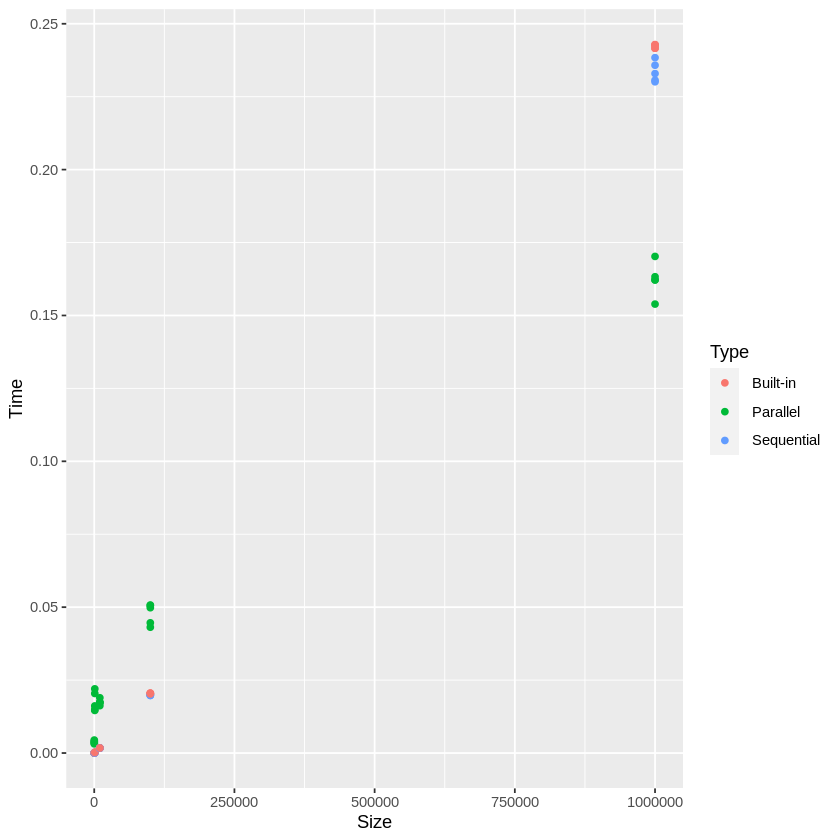

In [262]:
#plot data
ggplot(data, aes(x = Size, y = Time, color = Type)) + geom_point()

### Confidence interval

In this section, we will caluclate the confidence interval for each size and each type. Both lower bound and upper bound of condifence interval will be represented as mean - 2*sd / sqrt (n) , where mean is the mean value within the group and st is standard deviation within the group. Also, calculated information will be shown on the graph.

In [263]:
#add rows that represent mean value and lower and upper bound of confidence interval
result <- data %>%
  group_by(Type, Size) %>%
  summarize(mean=mean(Time),lower_bound = mean(Time) - 2 * sd(Time) / sqrt(n()),
            upper_bound = mean(Time) + 2 * sd(Time) / sqrt(n()),.groups="drop")

print(result)

# A tibble: 15 × 5
   Type             Size      mean lower_bound upper_bound
   <chr>           <int>     <dbl>       <dbl>       <dbl>
 1 " Built-in"       100 0.0000126   0.0000116   0.0000136
 2 " Built-in"      1000 0.000208    0.000204    0.000211 
 3 " Built-in"     10000 0.00172     0.00171     0.00173  
 4 " Built-in"    100000 0.0204      0.0203      0.0205   
 5 " Built-in"   1000000 0.242       0.242       0.243    
 6 " Parallel"       100 0.00375     0.00328     0.00421  
 7 " Parallel"      1000 0.0176      0.0146      0.0206   
 8 " Parallel"     10000 0.0174      0.0166      0.0183   
 9 " Parallel"    100000 0.0478      0.0445      0.0510   
10 " Parallel"   1000000 0.162       0.157       0.168    
11 " Sequential"     100 0.0000098   0.0000094   0.0000102
12 " Sequential"    1000 0.000128    0.000127    0.000129 
13 " Sequential"   10000 0.00170     0.00165     0.00174  
14 " Sequential"  100000 0.0199      0.0198      0.0200   
15 " Sequential" 1000000 0.234       

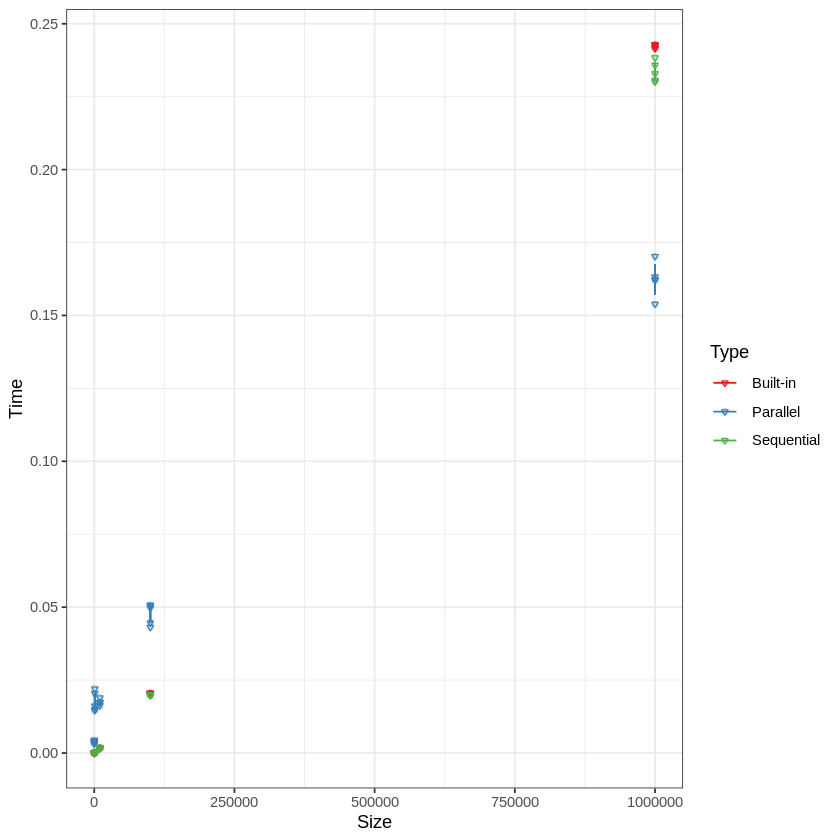

In [264]:
result <- result %>%
  left_join(data, by = c("Type", "Size"))

#plot data with confidence interval
ggplot(result, aes(x = Size, y = Time, color = Type)) + 
  scale_color_brewer(palette = "Set1") + 
  theme_bw() + 
  geom_jitter(alpha = 0.2, position = position_jitter(width = 0.1)) + 
  geom_errorbar(width = 0.1, aes(ymin = lower_bound, ymax = upper_bound)) +
  geom_point(shape = 25, size = 1)

### Linear regression

In this section, we will try to tit a linear model for the data.

In the following plot, we examine the linear relationship between "Size" and "Time" for different categories represented by the "Type". This allows us to observe any potential patterns or trends in the data and assess the strength and direction of the relationship between the variables within each group.

`geom_smooth()` using formula 'y ~ x'



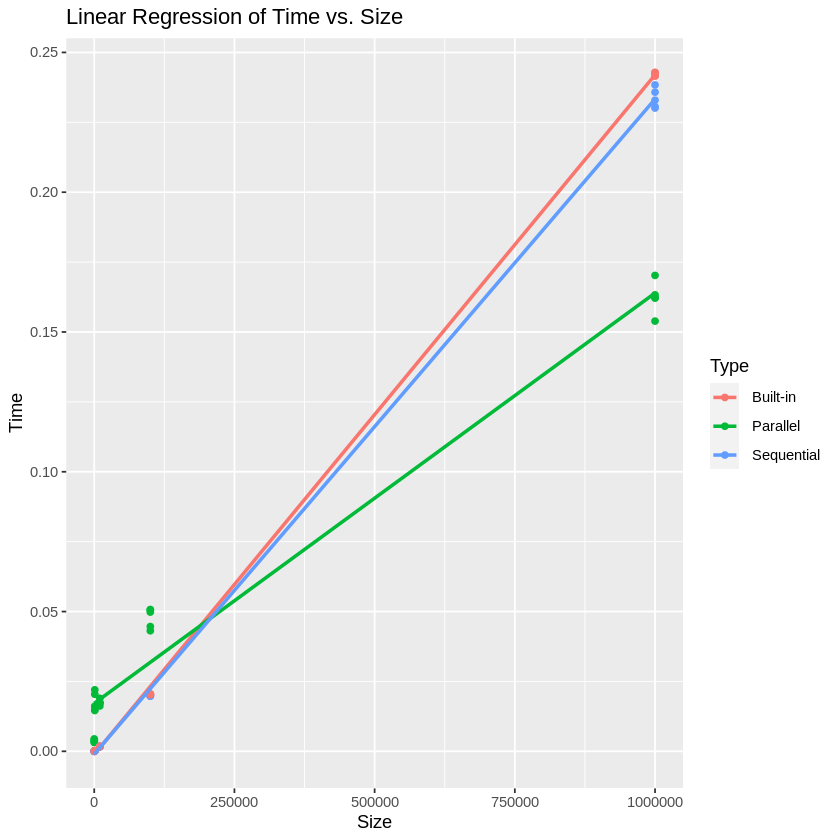

In [265]:
#display the results of linear regression of time against size, with data grouped by type
ggplot(data, aes(x = Size, y = Time, color = Type)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Linear Regression of Time vs. Size",
       x = "Size", y = "Time",
       color = "Type")

We can see that none of the groups is very well described by linear regression since we have a lot of outliners in each group. In the following part, we will discuss and summarize each group separately.


Call:
lm(formula = Time ~ Size, data = sequential_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0032211 -0.0023774  0.0004466  0.0010015  0.0050659 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.016e-03  4.583e-04  -2.217   0.0368 *  
Size         2.343e-07  1.020e-09 229.807   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.001992 on 23 degrees of freedom
Multiple R-squared:  0.9996,	Adjusted R-squared:  0.9995 
F-statistic: 5.281e+04 on 1 and 23 DF,  p-value: < 2.2e-16


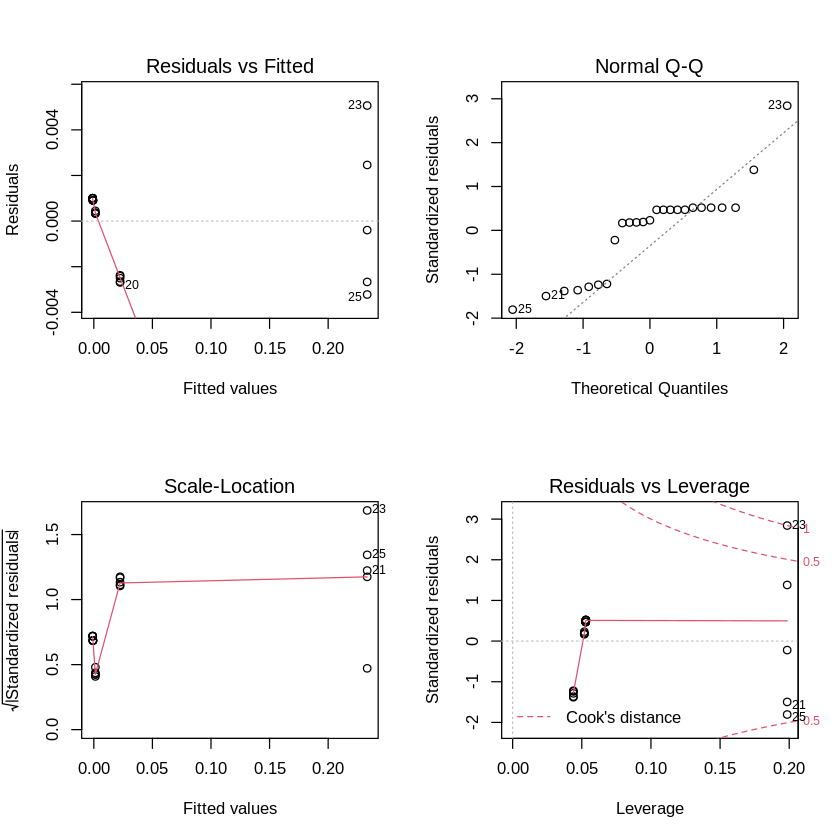

In [266]:
data <- mutate(data, Type = trimws(Type))

#apply linear regression for the group of Type = sequential
sequential_data <- filter(data, Type == "Sequential")
reg <- lm(Time ~ Size,data = sequential_data)

summary(reg)

par(mfrow=c(2,2));
plot(reg)

Based on the linear regression summary, we can observe that the high value of the adjusted R-squared close to 1 indicates that the model explains the variance in the data well. Also, the residual standard error is small, indicating that the model's predictions are close to the actual values. 
The F-statistic is large with a low p-value  which means that there is strong evidence to reject the null hypothesis that all the regression coefficients are equal to zero, suggesting that at least one of the independent variables has a significant effect on the dependent variable.

However, from the residuals vs fitted plot,we can see that residuals seem to be concentrated in some places, which may indicate a lack of randomness and non-linearity. Also in scale-location, residuals are conentrated in some places which can indicate that there is unequal variability of residuals depending on the fitted values.


Call:
lm(formula = Time ~ Size, data = build_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0029607 -0.0003849  0.0005001  0.0010631  0.0010858 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.096e-03  3.513e-04   -3.12  0.00482 ** 
Size         2.431e-07  7.817e-10  310.98  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.001527 on 23 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9998 
F-statistic: 9.671e+04 on 1 and 23 DF,  p-value: < 2.2e-16


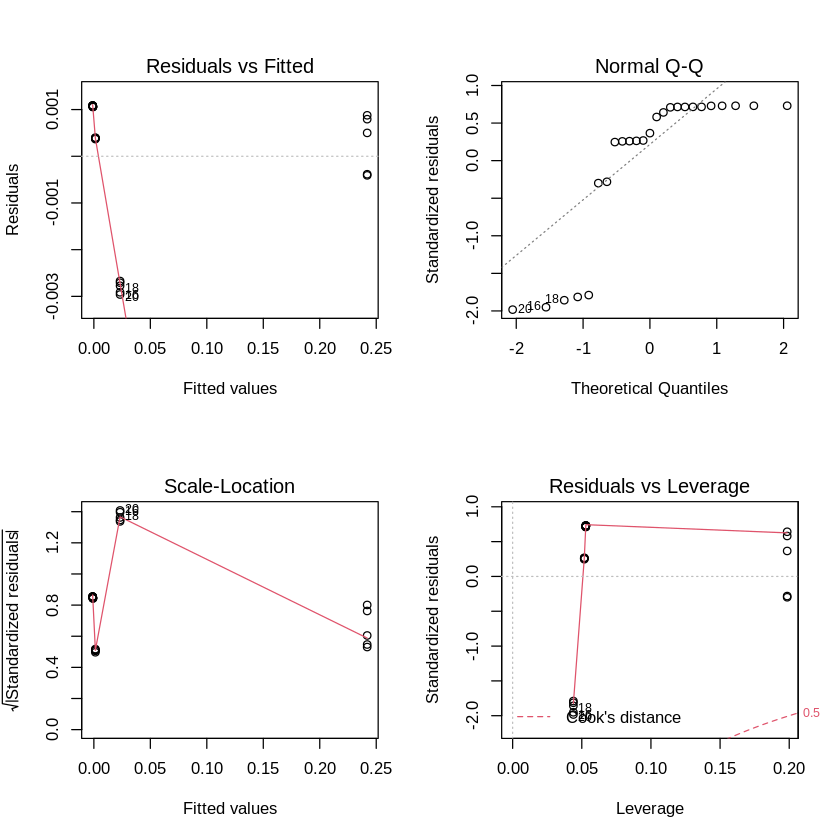

In [267]:
#apply linear regression for the group of Type = Built-in
build_data <- filter(data, Type == "Built-in")
reg <- lm(Time ~ Size,data = build_data)

summary(reg)

par(mfrow=c(2,2));
plot(reg)

Observing linear regression summary for Built-in type, we can see a highly significant relationship between the Size predictor and the Time response variable. Both the intercept and the coefficient for the Size predictor are statistically significant, indicating that as the Size increases, the Time tends to decrease. The model explains a large proportion of the variance in the response variable, with an adjusted R-squared value, indicating that nearly all of the variability in Time can be explained by the Size.

On the other side, looking at the graphs, we can observe that there is still a pattern that can be spotted and residuals are conentrated in some places which can indicate of non-linear relationship.


Call:
lm(formula = Time ~ Size, data = parallel_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.014052 -0.002723 -0.001290  0.004686  0.018888 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.717e-02  2.364e-03   7.263 2.16e-07 ***
Size        1.468e-07  5.260e-09  27.904  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01027 on 23 degrees of freedom
Multiple R-squared:  0.9713,	Adjusted R-squared:  0.9701 
F-statistic: 778.6 on 1 and 23 DF,  p-value: < 2.2e-16


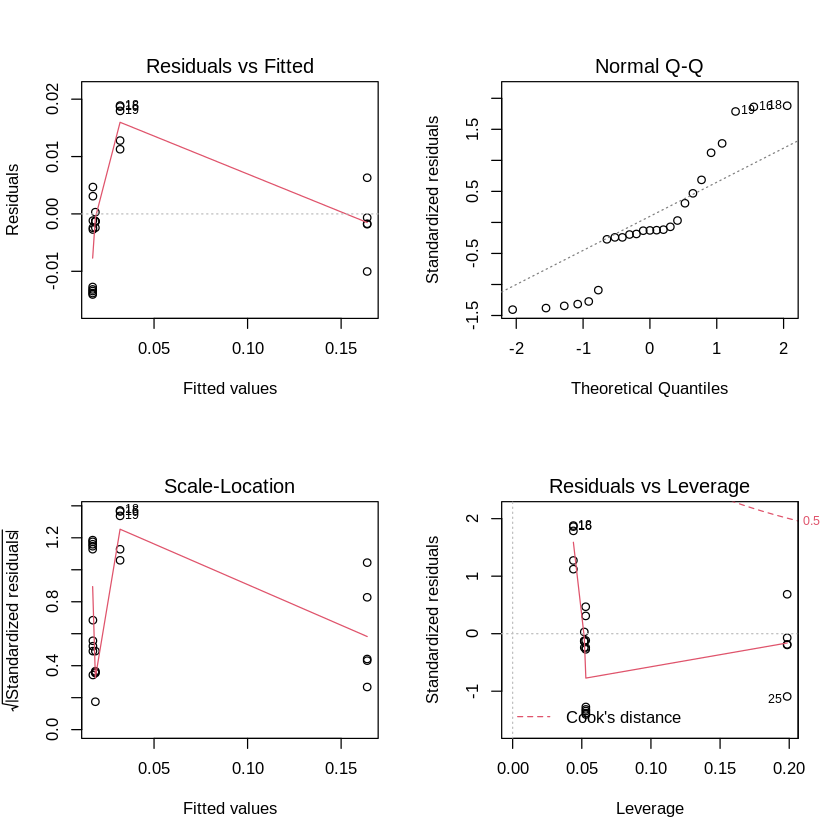

In [268]:
#apply linear regression for the group of Type = Parallel
parallel_data <- filter(data, Type == "Parallel")
reg <- lm(Time ~ Size,data = parallel_data)

summary(reg)

par(mfrow=c(2,2));
plot(reg)

Here, both the intercept and the coefficient for the Size predictor are statistically significant , indicating that as the Size increases, the Time tends to increase as well. Based on adjusted R-squared value, we can conclude that that large percent of the variability in Time can be explained by variations in Size.

However, the residuals appear to be more random distributed than the previous observations which can suggests that the model predictions are more reliable and there is less excessive systematic error in the model.

Based on the regression analysis, the models show a significant relationship between the input and output variables. However, the plots suggest some deviations from model assumptions, such as non-linearity or heteroskedasticity, which may require further analysis. Overall, while the model provides valuable insights, additional analysis or alternative modeling approaches may be useful for a better understanding of the data.

Let's try nlog(n)


Call:
lm(formula = Time ~ Size * log(Size), data = sequential_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0034691 -0.0000241 -0.0000015  0.0000165  0.0048179 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)    -7.421e-05  1.738e-03  -0.043   0.9663  
Size            2.101e-08  9.130e-08   0.230   0.8202  
log(Size)       1.405e-05  2.633e-04   0.053   0.9579  
Size:log(Size)  1.538e-08  6.482e-09   2.372   0.0273 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.00153 on 21 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9997 
F-statistic: 2.984e+04 on 3 and 21 DF,  p-value: < 2.2e-16


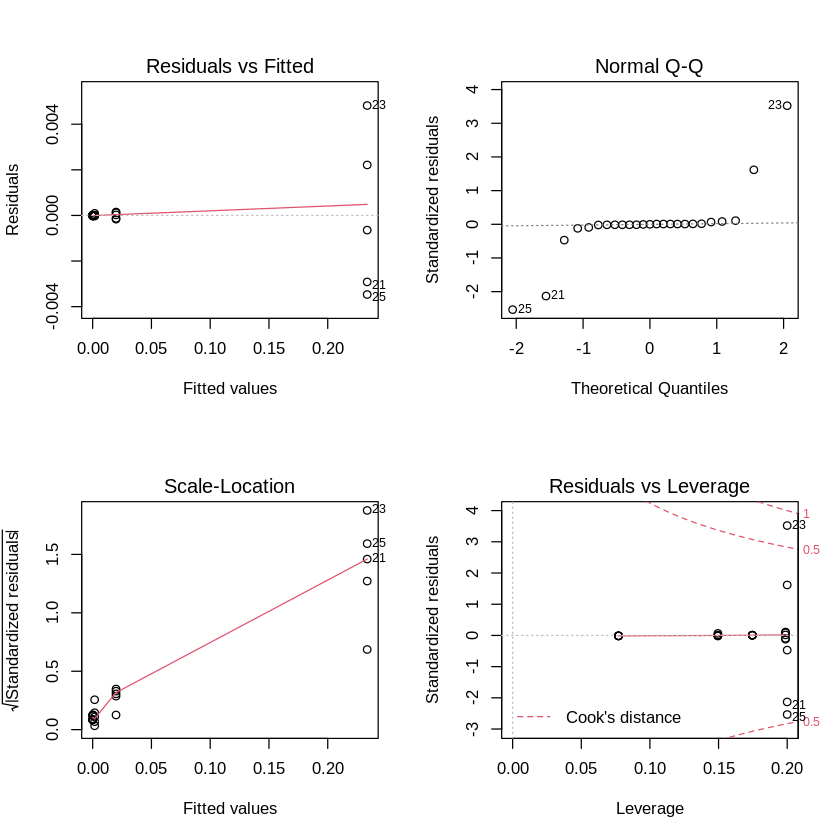

In [269]:
reg <- lm(Time ~ Size*log(Size),data = sequential_data)
summary(reg)

par(mfrow=c(2,2));
plot(reg)


Call:
lm(formula = Time ~ Size * log(Size), data = parallel_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.008483 -0.003062 -0.001747  0.002682  0.009780 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)    -5.113e-03  5.393e-03  -0.948  0.35386   
Size            7.842e-07  2.834e-07   2.768  0.01153 * 
log(Size)       2.443e-03  8.171e-04   2.990  0.00698 **
Size:log(Size) -4.708e-08  2.012e-08  -2.340  0.02922 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.004749 on 21 degrees of freedom
Multiple R-squared:  0.9944,	Adjusted R-squared:  0.9936 
F-statistic:  1244 on 3 and 21 DF,  p-value: < 2.2e-16


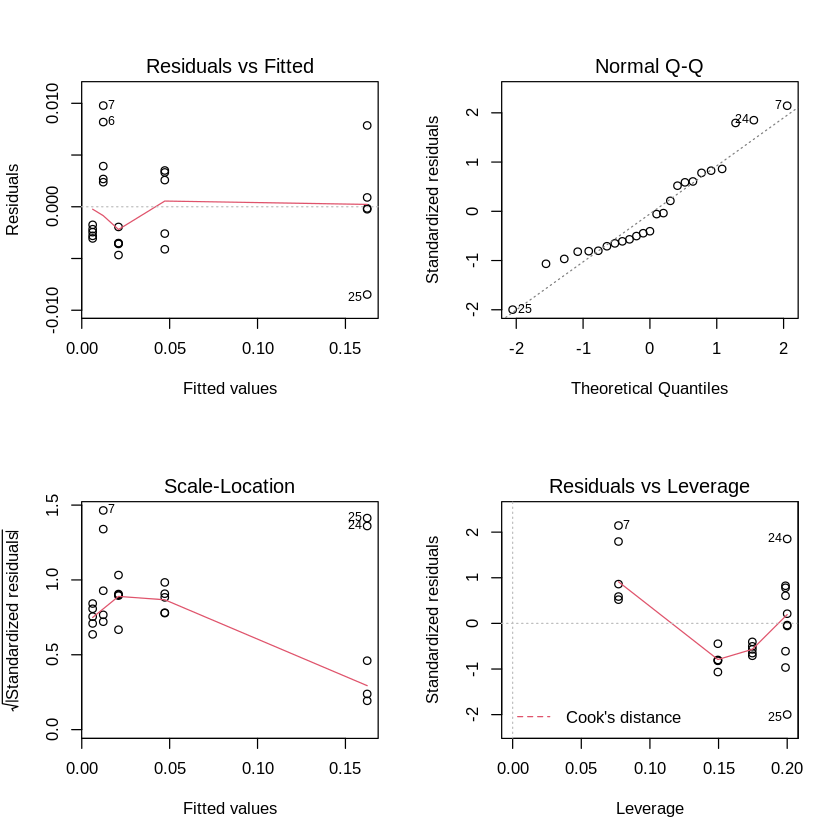

In [270]:
reg <- lm(Time ~ Size*log(Size),data = parallel_data)
summary(reg)

par(mfrow=c(2,2));
plot(reg)


Call:
lm(formula = Time ~ Size * log(Size), data = parallel_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.008483 -0.003062 -0.001747  0.002682  0.009780 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)    -5.113e-03  5.393e-03  -0.948  0.35386   
Size            7.842e-07  2.834e-07   2.768  0.01153 * 
log(Size)       2.443e-03  8.171e-04   2.990  0.00698 **
Size:log(Size) -4.708e-08  2.012e-08  -2.340  0.02922 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.004749 on 21 degrees of freedom
Multiple R-squared:  0.9944,	Adjusted R-squared:  0.9936 
F-statistic:  1244 on 3 and 21 DF,  p-value: < 2.2e-16


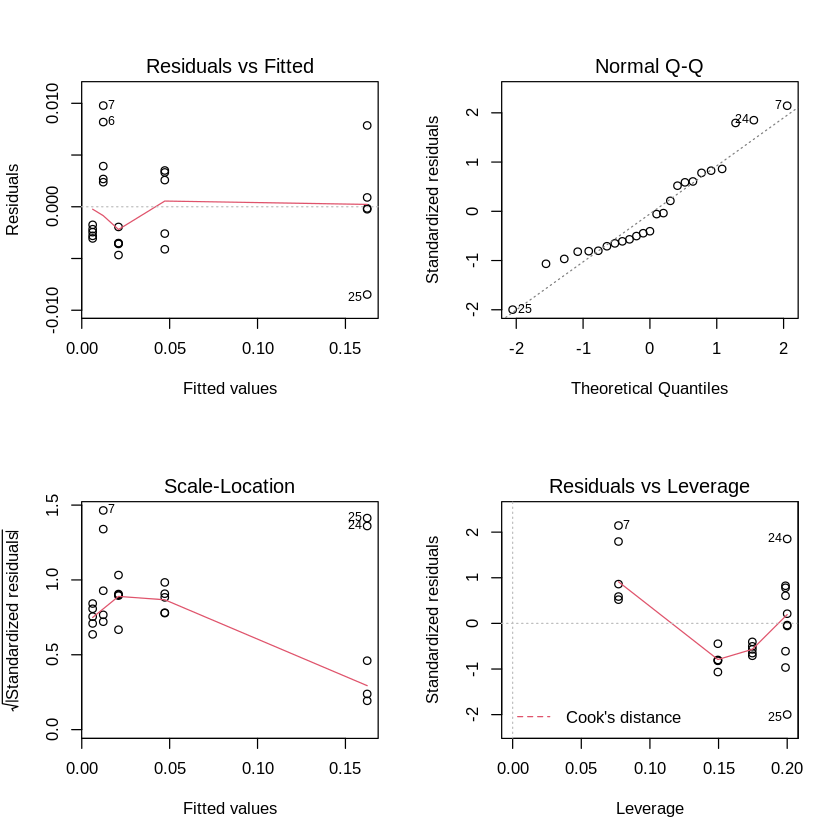

In [271]:
reg <- lm(Time ~ Size*log(Size),data = parallel_data)
summary(reg)

par(mfrow=c(2,2));
plot(reg)



From the above observation, we can conclude that there is a slight improvement of our model with this equation when comparing the results obtained by linear regression where the R-squared value and the residual standard error are higher. In addition, the coefficients for the interaction in nlogn are statistically significant in all cases, indicating that the relationship between time and size is not purely linear, but shows some curves. Therefore, adding an interaction term improves the model's ability to represent the relationship between the variables.